In [1]:
# import modules.torchneuromorphic.ntidigits.ntidigits_dataloaders as ntidigits_dataloaders
# data_path = '/data2'

# data_dir = data_path + '/ntidigits/ntidigits_isolated.hdf5'

# # root = 'data/tidigits/ntidigits_isolated.hdf5', batch_size = 72 , chunk_size_train = 1000, chunk_size_test = 1000, ds = 1, dt = 1000, transform_train = None, transform_test = None, target_transform_train = None, target_transform_test = None, **dl_kwargs):
# train_loader, test_loader = ntidigits_dataloaders.create_dataloader(
#     root = data_dir, chunk_size_train=1000, chunk_size_test=1000, batch_size=BATCH, dt = 1000, ds = [1], num_workers=num_workers)
# synapse_conv_in_channels = 64 # conv inchannel이 아니고 FC in_channel
# CLASS_NUM = 11
# # mapping = { 0 :'0',
# #     1 :'1',
# #     2 :'2',
# #     3 :'3',
# #     4 :'4',
# #     5 :'5',
# #     6 :'6',
# #     7 :'7',
# #     8 :'8',
# #     9 :'9',
# #     10: '10'}
# assert False, "이거 train_data_count 몇개임"
# train_data_count = len(train_set) if train_data_split_indices == [] else len(train_data_split_indices)


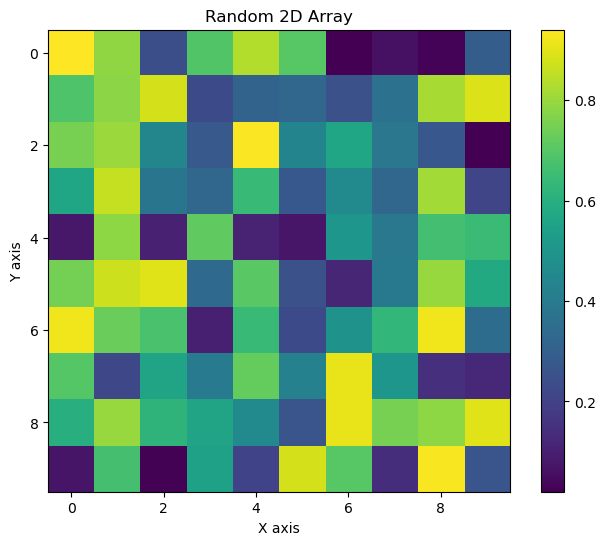

In [2]:

import modules.tonic as tonic

from modules.tonic import DiskCachedDataset

import torch


In [3]:

data_path = '/data2'
BATCH =1

num_workers = 1
my_seed = 1
pin_memory = True

transform_compose=[]
transform_compose.append(tonic.transforms.ToFrame(
    sensor_size=tonic.datasets.NTIDIGITS18.sensor_size,
    time_window=10000, 
    include_incomplete=False))
transform_compose = tonic.transforms.Compose(transform_compose)

train_dataset= tonic.datasets.NTIDIGITS18(save_to=data_path, train=True, single_digits=True, transform=transform_compose)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH, shuffle = True, num_workers=num_workers, drop_last=False, generator=torch.Generator().manual_seed(my_seed), pin_memory = pin_memory)


test_dataset= tonic.datasets.NTIDIGITS18(save_to=data_path, train=False, single_digits=True, transform=transform_compose)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH, shuffle = False, num_workers=num_workers, drop_last=False, generator=torch.Generator().manual_seed(my_seed), pin_memory = pin_memory)


In [4]:
print(len(train_loader))
print(len(test_loader))

2463
2486


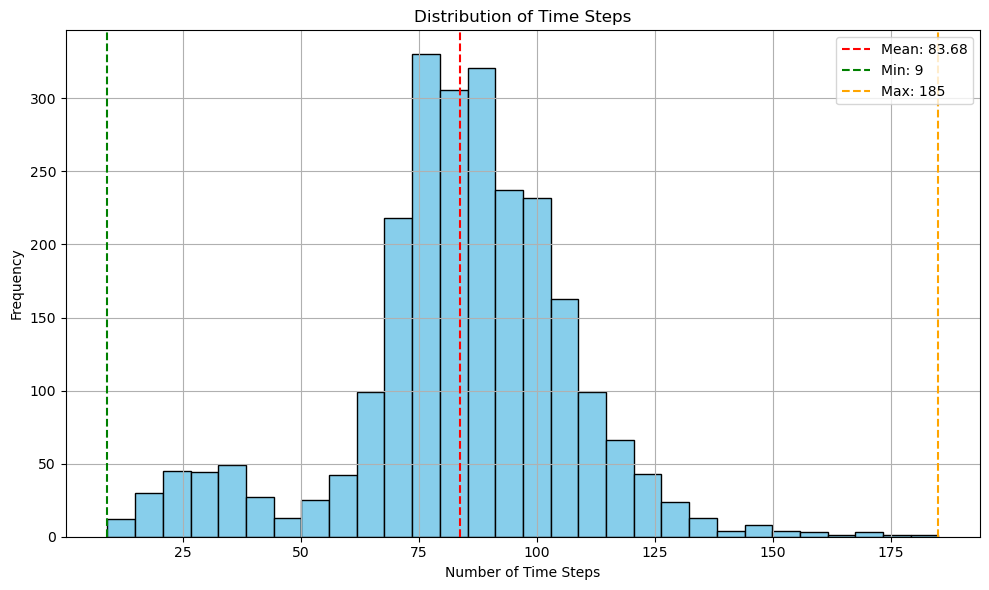

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예: timesteps 리스트가 다음과 같이 있다고 가정
# timesteps = [942, 952, 819, ...]  ← 이미 위 루프에서 채워졌다고 가정

timesteps_np = np.array(timesteps)

mean_ts = np.mean(timesteps_np)
min_ts = np.min(timesteps_np)
max_ts = np.max(timesteps_np)

plt.figure(figsize=(10, 6))
plt.hist(timesteps_np, bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_ts, color='red', linestyle='--', label=f'Mean: {mean_ts:.2f}')
plt.axvline(min_ts, color='green', linestyle='--', label=f'Min: {min_ts}')
plt.axvline(max_ts, color='orange', linestyle='--', label=f'Max: {max_ts}')
plt.title("Distribution of Time Steps")
plt.xlabel("Number of Time Steps")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


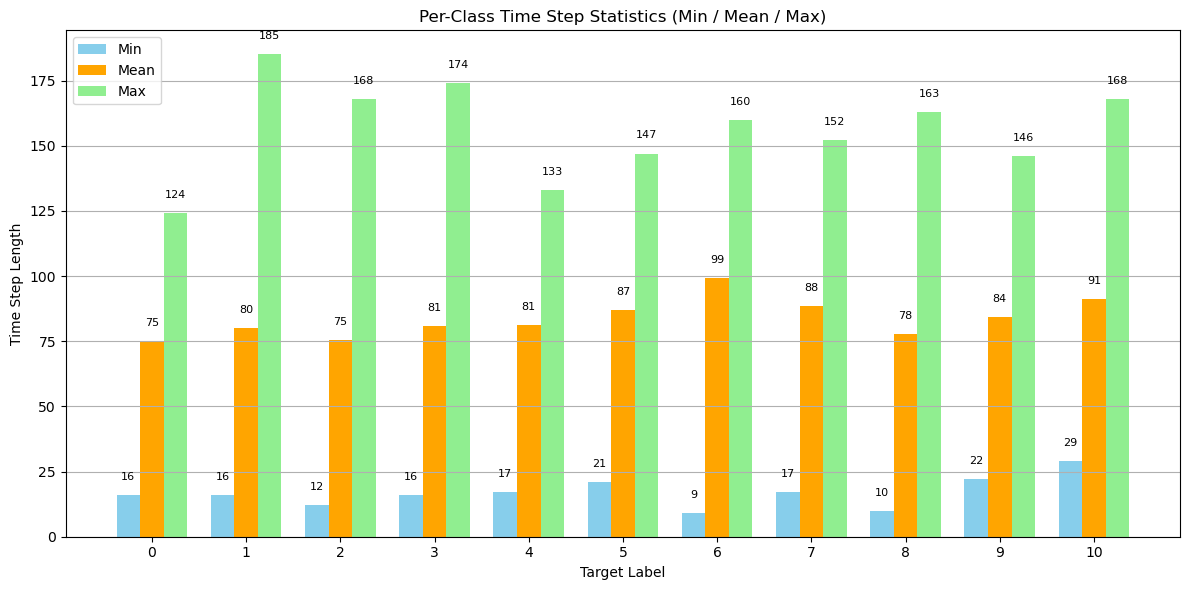

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Step 1: target별 timesteps 그룹화
target_timesteps = defaultdict(list)
for t, label in zip(timesteps, targets):
    label_int = label.item() if isinstance(label, torch.Tensor) else label
    target_timesteps[label_int].append(t)

# Step 2: 통계 계산
target_ids = sorted(target_timesteps.keys())
mins = [np.min(target_timesteps[t]) for t in target_ids]
means = [np.mean(target_timesteps[t]) for t in target_ids]
maxs = [np.max(target_timesteps[t]) for t in target_ids]

# Step 3: 시각화
x = np.arange(len(target_ids))
width = 0.25

plt.figure(figsize=(12, 6))
bars_min = plt.bar(x - width, mins, width=width, label='Min', color='skyblue')
bars_mean = plt.bar(x, means, width=width, label='Mean', color='orange')
bars_max = plt.bar(x + width, maxs, width=width, label='Max', color='lightgreen')

plt.xticks(x, target_ids)
plt.xlabel('Target Label')
plt.ylabel('Time Step Length')
plt.title('Per-Class Time Step Statistics (Min / Mean / Max)')
plt.legend()
plt.grid(axis='y')

# Step 4: 막대 위에 숫자 표기
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{height:.0f}',
                 ha='center', va='bottom', fontsize=8)

add_labels(bars_min)
add_labels(bars_mean)
add_labels(bars_max)

plt.tight_layout()
plt.show()


In [ ]:
timesteps=[]
targets = []
for inputs, target in test_loader:
    # print(target)
    # print("Inputs shape:", inputs.shape)
    # print("Target shape:", target.shape)
    timesteps.append(inputs.shape[1])
    targets.append(target)
    # break  # 첫 번째 배치만 확인하고 루프 종료

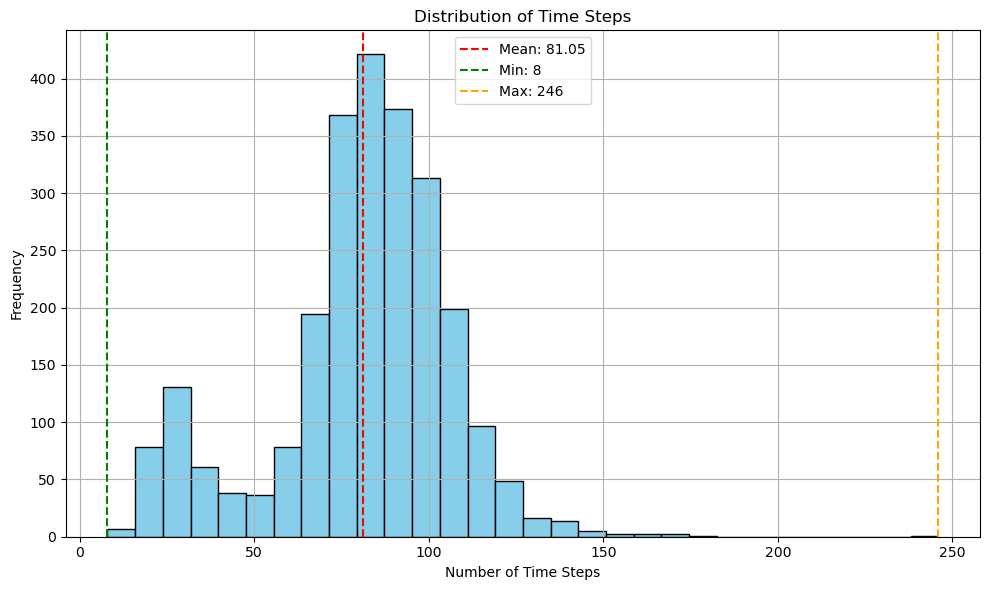

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예: timesteps 리스트가 다음과 같이 있다고 가정
# timesteps = [942, 952, 819, ...]  ← 이미 위 루프에서 채워졌다고 가정

timesteps_np = np.array(timesteps)

mean_ts = np.mean(timesteps_np)
min_ts = np.min(timesteps_np)
max_ts = np.max(timesteps_np)

plt.figure(figsize=(10, 6))
plt.hist(timesteps_np, bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_ts, color='red', linestyle='--', label=f'Mean: {mean_ts:.2f}')
plt.axvline(min_ts, color='green', linestyle='--', label=f'Min: {min_ts}')
plt.axvline(max_ts, color='orange', linestyle='--', label=f'Max: {max_ts}')
plt.title("Distribution of Time Steps")
plt.xlabel("Number of Time Steps")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


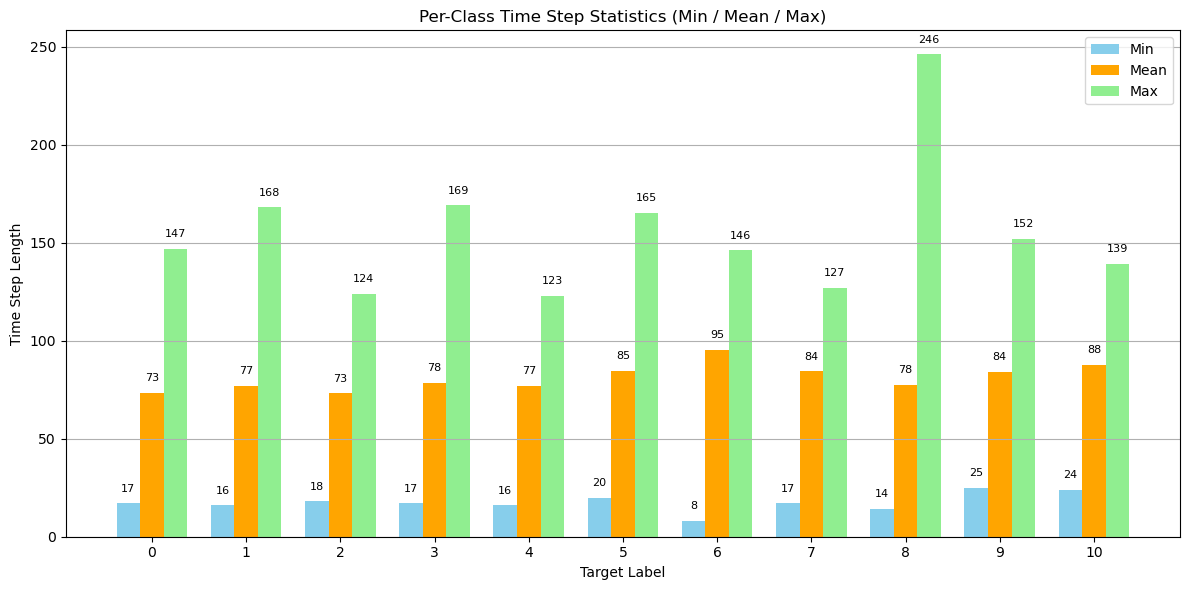

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Step 1: target별 timesteps 그룹화
target_timesteps = defaultdict(list)
for t, label in zip(timesteps, targets):
    label_int = label.item() if isinstance(label, torch.Tensor) else label
    target_timesteps[label_int].append(t)

# Step 2: 통계 계산
target_ids = sorted(target_timesteps.keys())
mins = [np.min(target_timesteps[t]) for t in target_ids]
means = [np.mean(target_timesteps[t]) for t in target_ids]
maxs = [np.max(target_timesteps[t]) for t in target_ids]

# Step 3: 시각화
x = np.arange(len(target_ids))
width = 0.25

plt.figure(figsize=(12, 6))
bars_min = plt.bar(x - width, mins, width=width, label='Min', color='skyblue')
bars_mean = plt.bar(x, means, width=width, label='Mean', color='orange')
bars_max = plt.bar(x + width, maxs, width=width, label='Max', color='lightgreen')

plt.xticks(x, target_ids)
plt.xlabel('Target Label')
plt.ylabel('Time Step Length')
plt.title('Per-Class Time Step Statistics (Min / Mean / Max)')
plt.legend()
plt.grid(axis='y')

# Step 4: 막대 위에 숫자 표기
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{height:.0f}',
                 ha='center', va='bottom', fontsize=8)

add_labels(bars_min)
add_labels(bars_mean)
add_labels(bars_max)

plt.tight_layout()
plt.show()
